In [ ]:
pip install catboost

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/content/creditcard.csv
/content/FastagFraudDetection.csv
/content/.config/gce
/content/.config/.last_opt_in_prompt.yaml
/content/.config/config_sentinel
/content/.config/.last_survey_prompt.yaml
/content/.config/default_configs.db
/content/.config/active_config
/content/.config/.last_update_check.json
/content/.config/configurations/config_default
/content/.config/logs/2024.03.28/22.59.49.289095.log
/content/.config/logs/2024.03.28/22.59.23.503148.log
/content/.config/logs/2024.03.28/23.00.06.826895.log
/content/.config/logs/2024.03.28/23.00.17.181244.log
/content/.config/logs/2024.03.28/22.59.58.938733.log
/content/.config/logs/2024.03.28/23.00.16.460892.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/california_housing_test.csv
/content/sample_data/california_housing_train.csv
/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
df=pd.read_csv('/content/FastagFraudDetection.csv')
df.sample(5)

,Transaction_ID,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Transaction_Amount,Amount_paid,Geographical_Location,Vehicle_Speed,Vehicle_Plate_Number,Fraud_indicator
1135,1136,6/22/2023 1:55,Car,FTG-132-WXY-345,A-101,Regular,Small,100,100,"12.84197701525119, 77.67547528176169",79,AP35WX5678,Not Fraud
646,647,1/12/2023 8:30,Motorcycle,NaN,D-106,Regular,Small,0,0,"13.042660878688794, 77.47580097259879",40,AP05IJ3344,Not Fraud
246,247,2/15/2023 13:20,Car,FTG-247-XCV-111,A-101,Express,Small,120,120,"13.059816123454882, 77.77068662374292",45,KA28CD6989,Not Fraud
2938,2939,12/30/2023 16:53,Van,FTG-439-UTY-943,B-102,Express,Medium,140,140,"13.059816123454882, 77.77068662374292",60,KA23SR2345,Not Fraud
3322,3323,12/9/2023 18:20,Truck,FTG-579-RFD-543,C-103,Express,Large,290,290,"13.042660878688794, 77.47580097259879",87,KA78JR2345,Not Fraud


In [ ]:
df.shape

(5000, 13)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Transaction_ID         5000 non-null   int64 
 1   Timestamp              5000 non-null   object
 2   Vehicle_Type           5000 non-null   object
 3   FastagID               4451 non-null   object
 4   TollBoothID            5000 non-null   object
 5   Lane_Type              5000 non-null   object
 6   Vehicle_Dimensions     5000 non-null   object
 7   Transaction_Amount     5000 non-null   int64 
 8   Amount_paid            5000 non-null   int64 
 9   Geographical_Location  5000 non-null   object
 10  Vehicle_Speed          5000 non-null   int64 
 11  Vehicle_Plate_Number   5000 non-null   object
 12  Fraud_indicator        5000 non-null   object
dtypes: int64(4), object(9)
memory usage: 507.9+ KB


In [ ]:
df.isnull().sum()

Transaction_ID             0
Timestamp                  0
Vehicle_Type               0
FastagID                 549
TollBoothID                0
Lane_Type                  0
Vehicle_Dimensions         0
Transaction_Amount         0
Amount_paid                0
Geographical_Location      0
Vehicle_Speed              0
Vehicle_Plate_Number       0
Fraud_indicator            0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
[features for features in df.columns if df[features].isnull().sum()>0]

['FastagID']

In [ ]:
df.describe(include='object')

,Timestamp,Vehicle_Type,FastagID,TollBoothID,Lane_Type,Vehicle_Dimensions,Geographical_Location,Vehicle_Plate_Number,Fraud_indicator
count,5000,5000,4451,5000,5000,5000,5000,5000,5000
unique,4423,7,4451,6,2,3,5,5000,2
top,1/1/2023 8:15,Bus,FTG-001-ABC-121,B-102,Regular,Large,"13.059816123454882, 77.77068662374292",KA11AB1234,Not Fraud
freq,5,716,1,1432,2858,2144,1000,1,4017


In [ ]:
df.columns

Index(['Transaction_ID', 'Timestamp', 'Vehicle_Type', 'FastagID',
       'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Transaction_Amount',
       'Amount_paid', 'Geographical_Location', 'Vehicle_Speed',
       'Vehicle_Plate_Number', 'Fraud_indicator'],
      dtype='object')

In [ ]:
column_values= ['Vehicle_Type', 'TollBoothID', 'Lane_Type', 'Vehicle_Dimensions', 'Fraud_indicator']

for column in column_values:
    print(f'Unique values for {column}:')
    print(df[column].unique())
    print()

Unique values for Vehicle_Type:
['Bus ' 'Car' 'Motorcycle' 'Truck' 'Van' 'Sedan' 'SUV']

Unique values for TollBoothID:
['A-101' 'B-102' 'D-104' 'C-103' 'D-105' 'D-106']

Unique values for Lane_Type:
['Express' 'Regular']

Unique values for Vehicle_Dimensions:
['Large' 'Small' 'Medium']

Unique values for Fraud_indicator:
['Fraud' 'Not Fraud']



In [ ]:
df.describe()

,Transaction_ID,Transaction_Amount,Amount_paid,Vehicle_Speed
count,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,161.06200,141.261000,67.851200
std,1443.520003,112.44995,106.480996,16.597547
min,1.000000,0.00000,0.000000,10.000000
25%,1250.750000,100.00000,90.000000,54.000000
50%,2500.500000,130.00000,120.000000,67.000000
75%,3750.250000,290.00000,160.000000,82.000000
max,5000.000000,350.00000,350.000000,118.000000


## Exploratory Data Analysis:

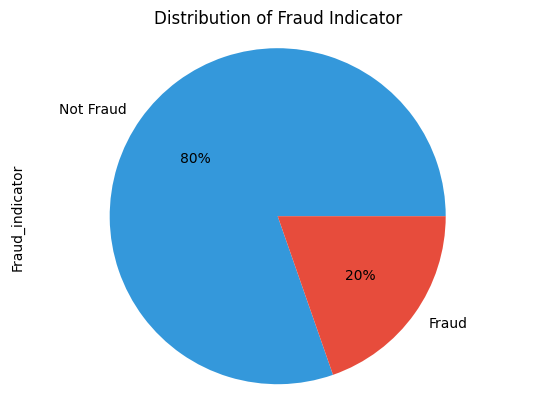

In [ ]:
colors = ['#3498db', '#e74c3c']
df['Fraud_indicator'].value_counts().plot(kind='pie', autopct='%1.f%%', colors=colors)
plt.title('Distribution of Fraud Indicator')
plt.axis('equal')
plt.show()

In [ ]:
df['Fraud_indicator'].value_counts()

Not Fraud    4017
Fraud         983
Name: Fraud_indicator, dtype: int64

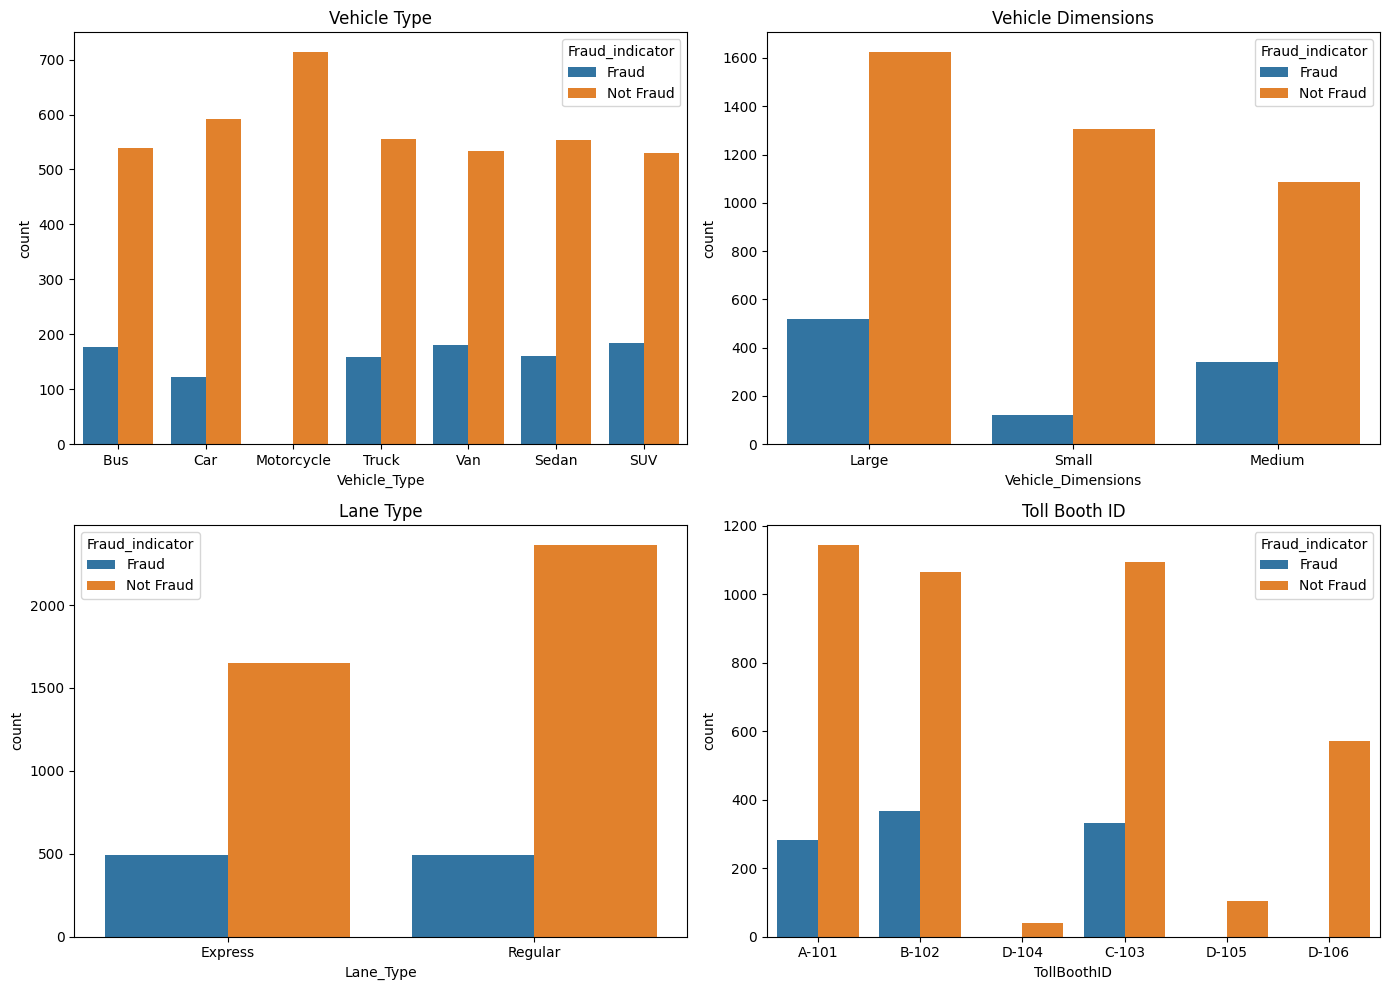

In [ ]:
# Create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot countplots in each subplot
sns.countplot(x='Vehicle_Type', data=df, hue='Fraud_indicator', ax=axes[0, 0])
axes[0, 0].set_title('Vehicle Type')

sns.countplot(x='Vehicle_Dimensions', data=df, hue='Fraud_indicator', ax=axes[0, 1])
axes[0, 1].set_title('Vehicle Dimensions')

sns.countplot(x='Lane_Type', data=df, hue='Fraud_indicator', ax=axes[1, 0])
axes[1, 0].set_title('Lane Type')

sns.countplot(x='TollBoothID', data=df, hue='Fraud_indicator', ax=axes[1, 1])
axes[1, 1].set_title('Toll Booth ID')

# Adjust layout for better spacing
plt.tight_layout()

# General Insights

1.Motorcycles haven't been involved in any recorded fraud instances across all TollBooths.
2.SUVs have a relatively high count of both fraud and not fraud instances.
3.Buses, Sedans, Trucks, and Vans show a mix of fraud and not fraud instances.

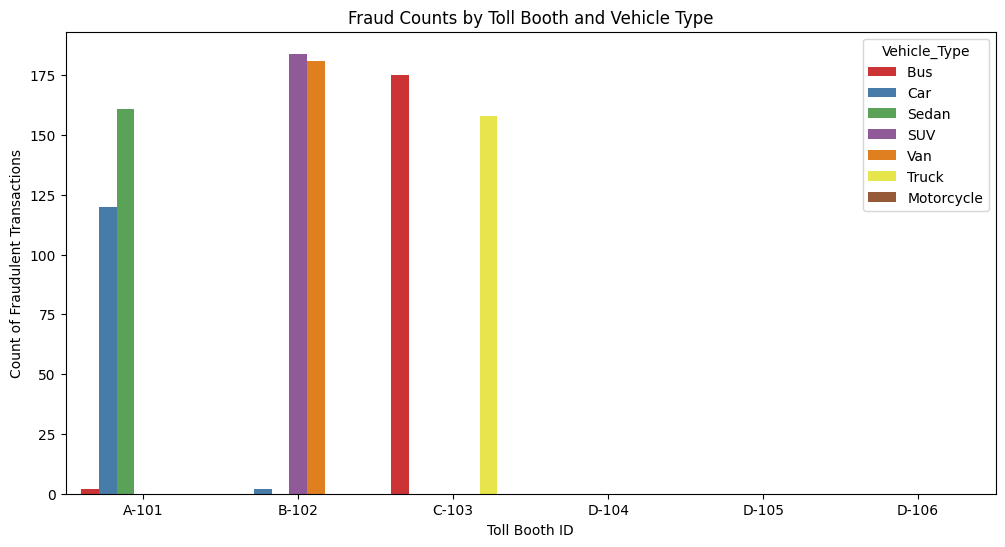

In [ ]:
derived = df.groupby(['TollBoothID','Vehicle_Type','Fraud_indicator']).size().reset_index(name='Count')
derived_pivot = derived.pivot_table(index=['TollBoothID', 'Vehicle_Type'], columns='Fraud_indicator', values='Count', fill_value=0).reset_index()

# Define a custom color palette
custom_palette = sns.color_palette("Set1", n_colors=len(derived_pivot['Vehicle_Type'].unique()))

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='TollBoothID', y='Fraud', data=derived_pivot, hue='Vehicle_Type', palette=custom_palette, dodge=True)
plt.title('Fraud Counts by Toll Booth and Vehicle Type')
plt.xlabel('Toll Booth ID')
plt.ylabel('Count of Fraudulent Transactions')
plt.show()

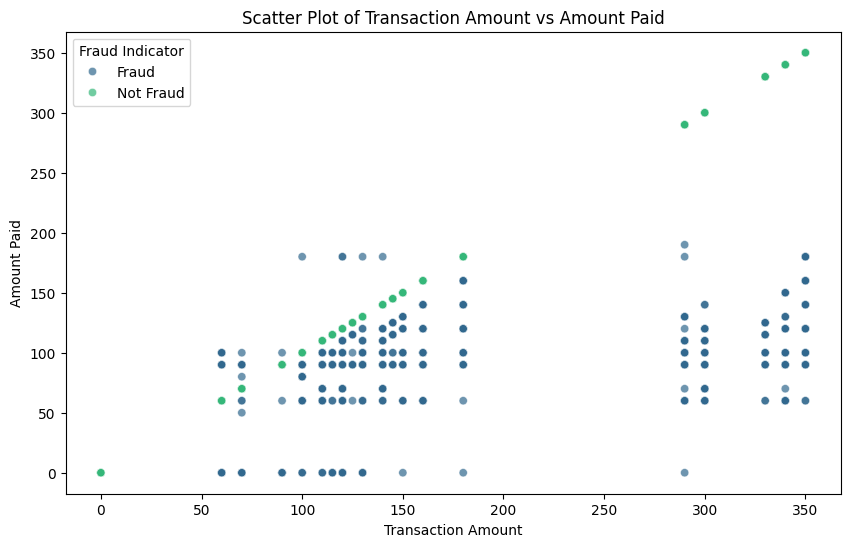

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Transaction_Amount', y='Amount_paid', hue='Fraud_indicator', data=df, palette='viridis', alpha=0.7)
plt.title('Scatter Plot of Transaction Amount vs Amount Paid')
plt.xlabel('Transaction Amount')
plt.ylabel('Amount Paid')
plt.legend(title='Fraud Indicator')

# General Insight:

Upon close examination of the data, it becomes evident that instances of fraud tend to occur when the Transaction amount is either significantly lower or higher to Amount paid. Conversely, when the Transaction amount is equal to Amount paid, it generally corresponds to non-fraudulent transactions.

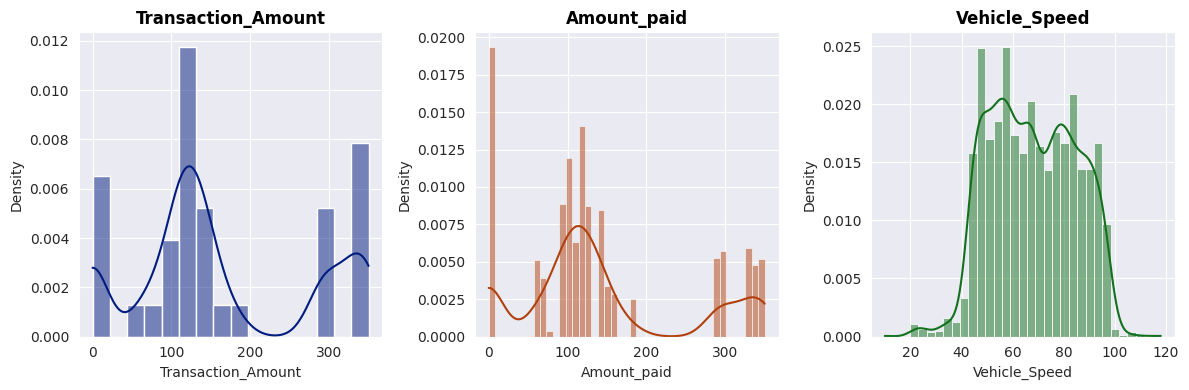

In [ ]:
numerical_columns = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']

sns.set_style('darkgrid')
colors = sns.color_palette(palette='dark', n_colors=len(numerical_columns))
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], color=colors[i], kde=True, fill=True, stat='density', ax=axs[i])
    axs[i].set_title(col, color='black', fontweight='bold')

fig.tight_layout()

In [ ]:
df['State_Code'] = df['Vehicle_Plate_Number'].str[:2]

In [ ]:
#dropping column Vehicle_Plate_Number
df=df.drop('Vehicle_Plate_Number', axis=1)

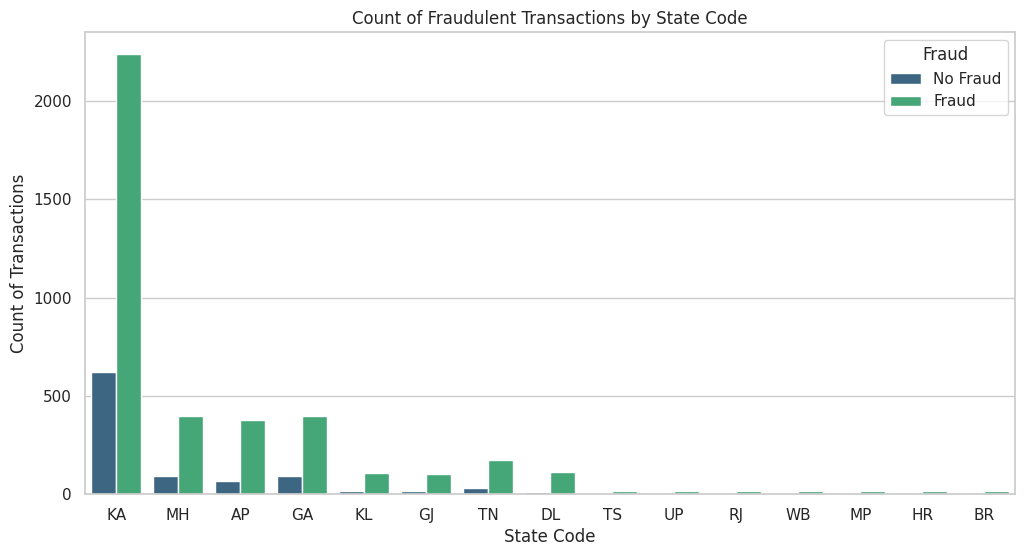

In [ ]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create the count plot
sns.countplot(x='State_Code', data=df, hue='Fraud_indicator', palette='viridis')

# Add title and labels
plt.title('Count of Fraudulent Transactions by State Code')
plt.xlabel('State Code')
plt.ylabel('Count of Transactions')

# Show the legend
plt.legend(title='Fraud', labels=['No Fraud', 'Fraud'])

# Display the plot
plt.show()


In [ ]:
fraud_counts_by_state = df.loc[df['Fraud_indicator'] == 'Fraud', 'State_Code'].value_counts()

# Display the fraud counts by state
print(fraud_counts_by_state)

KA    623
GA     93
MH     92
AP     68
TN     31
GJ     16
KL     14
DL     12
TS      8
RJ      7
BR      6
HR      5
UP      4
WB      2
MP      2
Name: State_Code, dtype: int64


In [ ]:
# Convert 'Timestamp' to datetime format if it's not already
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extract components
df['Hour'] = df['Timestamp'].dt.hour
df['DayOfWeek'] = df['Timestamp'].dt.dayofweek
df['Month'] = df['Timestamp'].dt.month

In [ ]:
#dropping column timestamp
df=df.drop('Timestamp', axis=1)

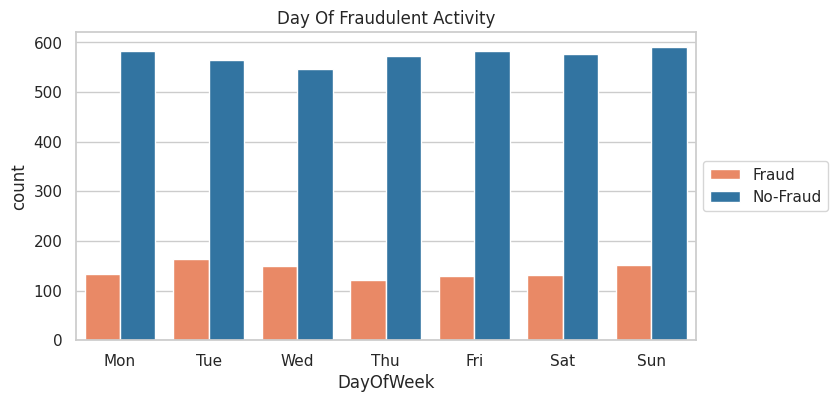

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='DayOfWeek', hue='Fraud_indicator', palette=['#ff7f50', '#1f77b4'])
plt.title('Day Of Fraudulent Activity')
plt.legend(labels=['Fraud', 'No-Fraud'], loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

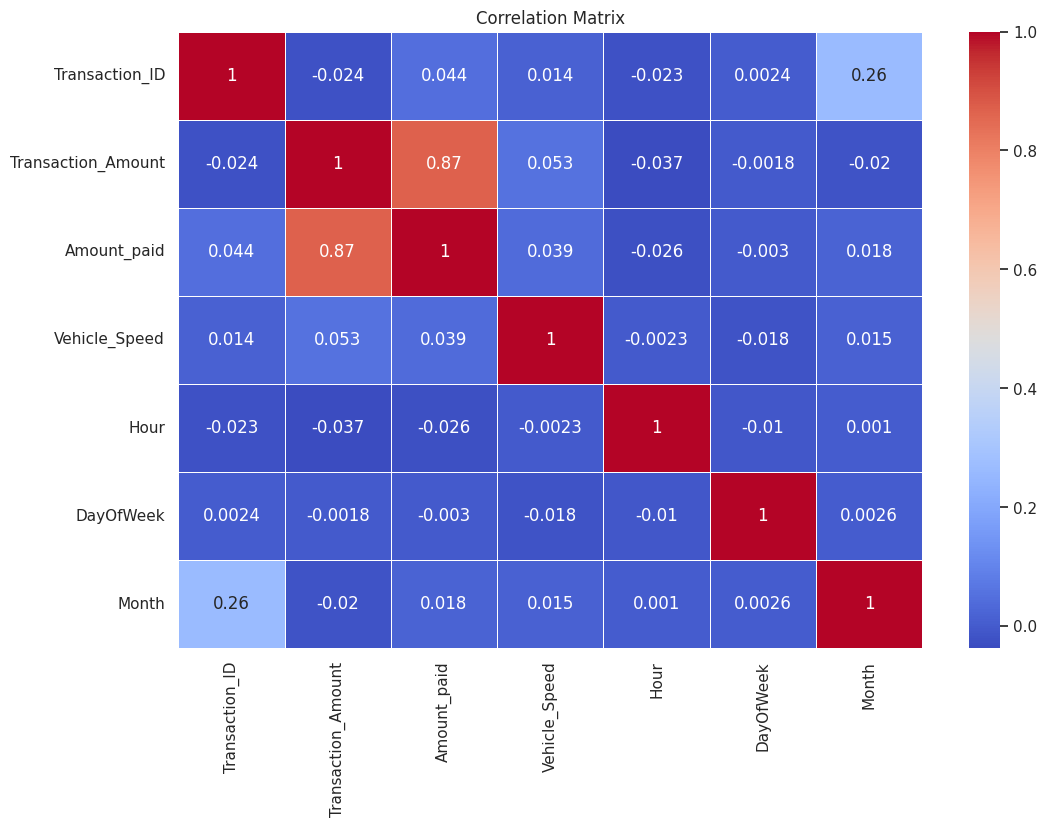

In [ ]:
# Assuming 'df' is your DataFrame
numeric_columns = df.select_dtypes(include=['number']).columns
correlation_matrix = df[numeric_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

# Feature Engineering

In [ ]:
# Remove 'Transaction_ID', 'FastagID', and 'Geographical_Location' columns
df = df.drop(['Transaction_ID', 'FastagID', 'Geographical_Location'], axis=1)

# General Insight:

Transaction_ID' and 'FastagID' columns contain unique identifiers and are not important for my model!

In [ ]:
label_encoder=LabelEncoder()
df['Fraud_indicator']=label_encoder.fit_transform(df['Fraud_indicator'])

In [ ]:
# Separate features and target
X = df.drop('Fraud_indicator', axis=1)
y = df['Fraud_indicator']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Column Transformer:

In [ ]:
trans = ColumnTransformer(transformers=[
    ('trf1', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'), ['Vehicle_Type', 'TollBoothID', 'State_Code']),
    ('trf2', OrdinalEncoder(categories=[['Regular', 'Express']]), ['Lane_Type']),
    ('trf3', OrdinalEncoder(categories=[['Small', 'Medium', 'Large']]), ['Vehicle_Dimensions']),
], remainder='passthrough')

# Fit and transform the training set
X_train_transformed = trans.fit_transform(X_train)

# Transform the test set using the parameters learned from the training set
X_test_transformed = trans.transform(X_test)

# Handling Imbalance Dataset

In [ ]:
smote = SMOTE(random_state=27)
smote_X_train, smote_y_train= smote.fit_resample(X_train_transformed,y_train)
smote_X_test, smote_y_test= smote.fit_resample(X_test_transformed,y_test)

# Model:

Best parameters for Ada Boost: {'learning_rate': 1.0}
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1607
           1       0.96      0.99      0.98      1607

    accuracy                           0.98      3214
   macro avg       0.98      0.98      0.98      3214
weighted avg       0.98      0.98      0.98      3214



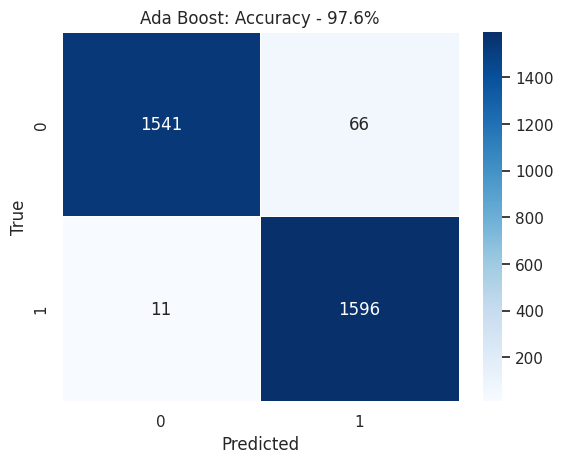

Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1607
           1       0.99      1.00      1.00      1607

    accuracy                           1.00      3214
   macro avg       1.00      1.00      1.00      3214
weighted avg       1.00      1.00      1.00      3214



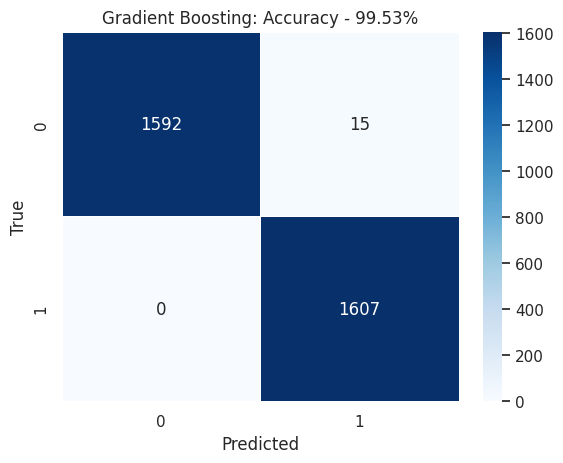

Best parameters for XGBoost: {'learning_rate': 0.5}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1607
           1       0.99      1.00      1.00      1607

    accuracy                           1.00      3214
   macro avg       1.00      1.00      1.00      3214
weighted avg       1.00      1.00      1.00      3214



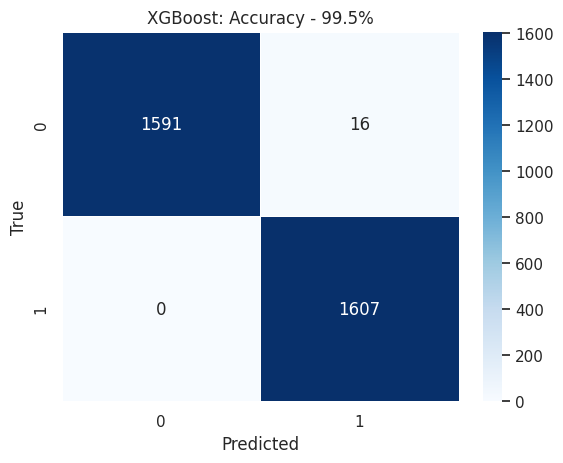

Best parameters for Random Forest: {'n_estimators': 50}
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1607
           1       0.97      1.00      0.98      1607

    accuracy                           0.98      3214
   macro avg       0.98      0.98      0.98      3214
weighted avg       0.98      0.98      0.98      3214



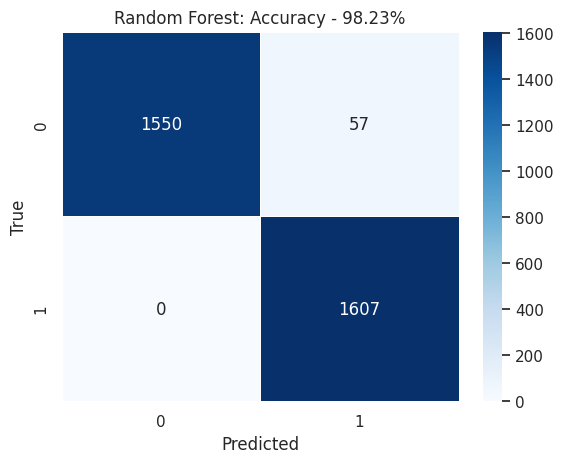

Best parameters for Decision Tree: {'max_depth': 15}
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1607
           1       0.99      1.00      1.00      1607

    accuracy                           1.00      3214
   macro avg       1.00      1.00      1.00      3214
weighted avg       1.00      1.00      1.00      3214



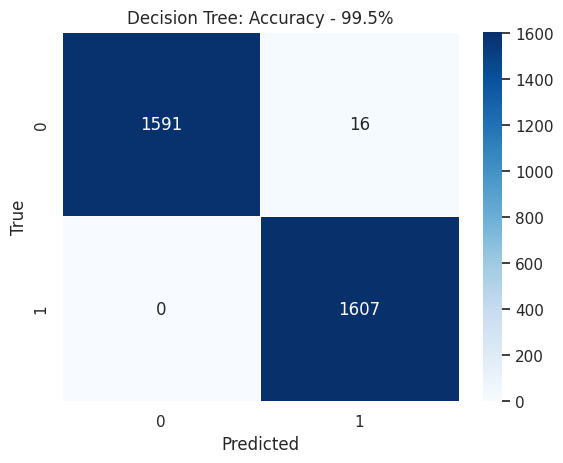

In [ ]:
def train_and_evaluate_with_grid_search(model, name, X_train, y_train, X_test, y_test, param_grid):
    # Perform grid search for hyperparameter tuning
    grid_search = GridSearchCV(model, param_grid, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    # Get the best model with optimal hyperparameters
    best_model = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

    # Evaluate the best model on the test set
    pred = best_model.predict(X_test)
    score = accuracy_score(y_test, pred)
    report = classification_report(y_test, pred)
    print(report)

    # Display a confusion matrix heatmap
    cm = confusion_matrix(y_test, pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5)
    plt.title(f"{name}: Accuracy - {round(score * 100, 2)}%")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Define the parameter grids for each model
param_grid_abc = {'learning_rate': [0.5, 0.9, 1.0]}
param_grid_gbc = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2]}
param_grid_xgb = {'learning_rate': [0.5, 0.9, 1.0]}
param_grid_rfc = {'n_estimators': [50, 100, 200]}
param_grid_dt = {'max_depth': [5, 10, 15]}  # Parameter grid for Decision Tree

# Create models with GridSearchCV
abc = AdaBoostClassifier()
gbc = GradientBoostingClassifier()
xgb = XGBClassifier()
rfc = RandomForestClassifier()
dt = DecisionTreeClassifier()  # Add Decision Tree

models = [abc, gbc, xgb, rfc, dt]  # Update the list of models
names = ["Ada Boost", "Gradient Boosting", "XGBoost", "Random Forest", "Decision Tree"]  # Update the list of names
param_grids = [param_grid_abc, param_grid_gbc, param_grid_xgb, param_grid_rfc, param_grid_dt]  # Update the list of parameter grids

# Iterate over models and perform training, evaluation, and visualization
for model, name, param_grid in zip(models, names, param_grids):
    train_and_evaluate_with_grid_search(model, name, smote_X_train, smote_y_train, smote_X_test, smote_y_test, param_grid)

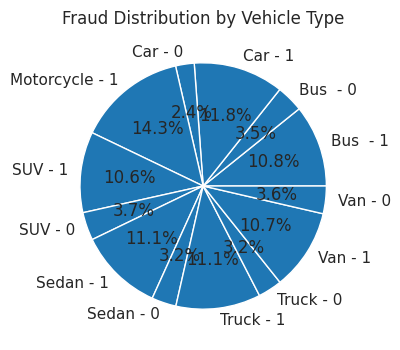

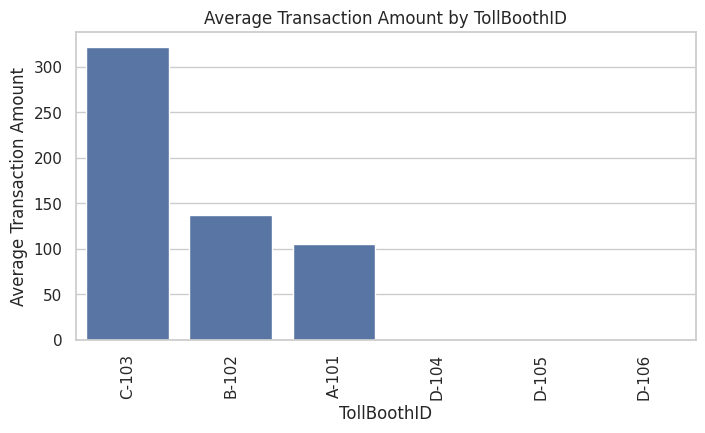

In [ ]:
# prompt: create more graphs on this dataset

# 4. Pie Chart of Fraud Distribution by Vehicle Type
fraud_by_vehicle_type = df.groupby('Vehicle_Type')['Fraud_indicator'].value_counts()

labels = [f'{vehicle_type} - {fraud}' for vehicle_type, fraud in fraud_by_vehicle_type.index]
colors = ['#ff7f50' if fraud == 'Fraud' else '#1f77b4' for vehicle_type, fraud in fraud_by_vehicle_type.index]

plt.figure(figsize=(8, 4))
plt.pie(fraud_by_vehicle_type, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Fraud Distribution by Vehicle Type')
plt.show()

# 5. Bar Plot of Average Transaction Amount by TollBoothID
avg_transaction_amount_by_tollbooth = df.groupby('TollBoothID')['Transaction_Amount'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 4))
sns.barplot(x=avg_transaction_amount_by_tollbooth.index, y=avg_transaction_amount_by_tollbooth.values)
plt.title('Average Transaction Amount by TollBoothID')
plt.xlabel('TollBoothID')
plt.ylabel('Average Transaction Amount')
plt.xticks(rotation=90)
plt.show()


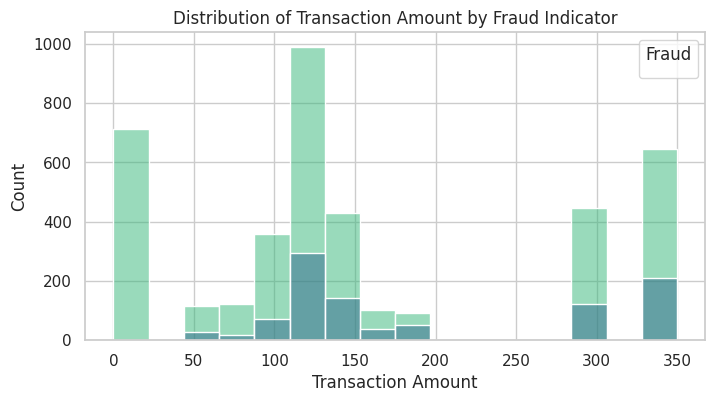

<ipython-input-47-1eb2bf772ab2>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




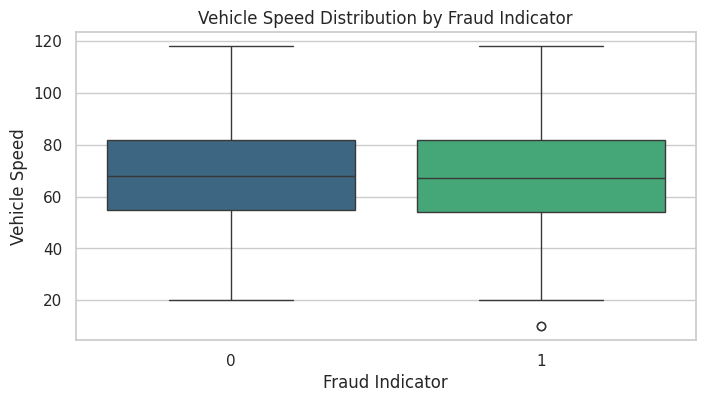

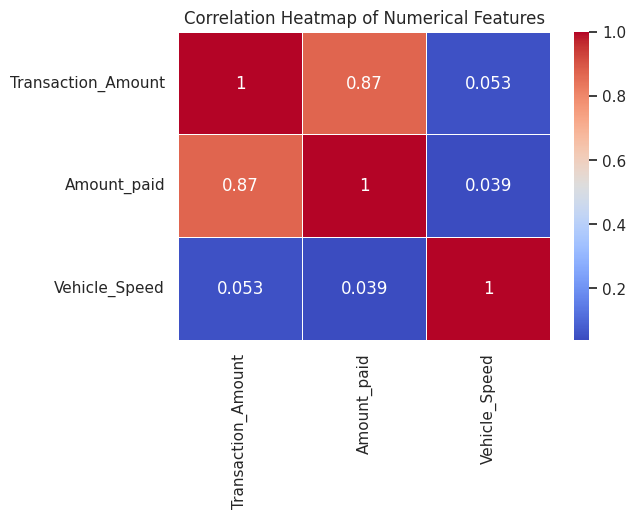

In [ ]:
# prompt: create more graphs on this dataset

# 1. Distribution of Transaction Amount by Fraud Indicator
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Transaction_Amount', hue='Fraud_indicator', palette='viridis')
plt.title('Distribution of Transaction Amount by Fraud Indicator')
plt.xlabel('Transaction Amount')
plt.ylabel('Count')
plt.legend(title='Fraud')
plt.show()

# 2. Boxplot of Vehicle Speed by Fraud Indicator
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='Fraud_indicator', y='Vehicle_Speed', palette='viridis')
plt.title('Vehicle Speed Distribution by Fraud Indicator')
plt.xlabel('Fraud Indicator')
plt.ylabel('Vehicle Speed')
plt.show()

# 3. Correlation Heatmap of Numerical Features
numerical_features = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X = df[['Transaction_Amount','Amount_paid']]
y = df['Fraud_indicator']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [ ]:
#Neural network model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                96        
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 641 (2.50 KB)
Trainable params: 641 (2.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Epoch 1/10
100/100 [==============================] - 3s 10ms/step - loss: 0.4309 - accuracy: 0.8144 - val_loss: 0.3212 - val_accuracy: 0.8700
Epoch 2/10
100/100 [==============================] - 1s 6ms/step - loss: 0.2689 - accuracy: 0.8866 - val_loss: 0.1979 - val_accuracy: 0.9112
Epoch 3/10
100/100 [==============================] - 0s 5ms/step - loss: 0.1758 - accuracy: 0.9309 - val_loss: 0.1306 - val_accuracy: 0.9475
Epoch 4/10
100/100 [==============================] - 1s 6ms/step - loss: 0.1298 - accuracy: 0.9594 - val_loss: 0.0966 - val_accuracy: 0.9700
Epoch 5/10
100/100 [==============================] - 0s 5ms/step - loss: 0.1056 - accuracy: 0.9681 - val_loss: 0.0757 - val_accuracy: 0.9787
Epoch 6/10
100/100 [==============================] - 1s 6ms/step - loss: 0.0921 - accuracy: 0.9769 - val_loss: 0.0647 - val_accuracy: 0.9875
Epoch 7/10
100/100 [==============================] - 1s 5ms/step - loss: 0.0829 - accuracy: 0.9812 - val_loss: 0.0540 - val_accuracy: 0.9875
Epoch

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_pred_prob = model.predict(X_test)

# Convert probabilities to binary predictions
y_pred = np.round(y_pred_prob)

# Print accuracy metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print accuracy metrics
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1))

32/32 [==============================] - 0s 1ms/step
Accuracy: 98.20%
Precision: 0.98
Recall: 1.00
F1 Score: 0.99


In [ ]:
print(y_pred_prob[:5])
y_pred[:5]

[[0.999982  ]
 [0.993449  ]
 [0.992328  ]
 [0.95528555]
 [0.93080115]]


array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

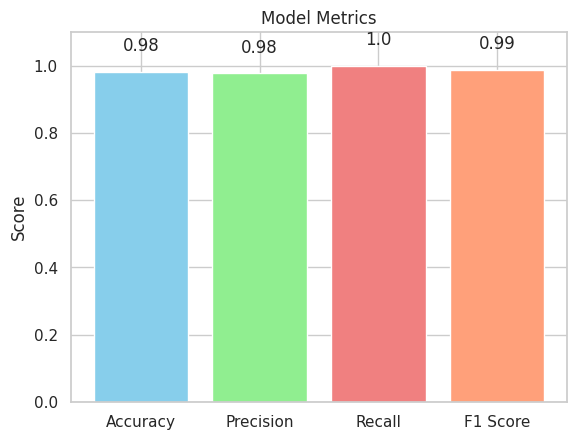

In [ ]:
import matplotlib.pyplot as plt

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
values = [accuracy, precision, recall, f1]

# Define custom colors for bars and text
bar_colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightsalmon']
plt.bar(metrics, values, color=bar_colors)

# Adding values on top of each bar
for i, v in enumerate(values):
    plt.text(i, v + 0.05, str(round(v, 2)), ha='center', va='bottom')

plt.ylabel('Score')
plt.title('Model Metrics')
plt.ylim(0, 1.1)
plt.show()

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import joblib

# Load the trained model
model = joblib.load('model.pkl')

# Load the CSV data
data = pd.read_csv("/content/FastagFraudDetection.csv")

# Function to preprocess input data
def preprocess_input(input_data):
    # Preprocessing steps specific to your data format
    # Here, you need to convert the input data into a format suitable for prediction
    # You can parse the input_data and prepare it accordingly
    # Example: convert categorical variables to numerical using LabelEncoder
    return input_data

# Function to make predictions using the trained model
def make_prediction(model, input_data):
    # Preprocess input data
    preprocessed_input = preprocess_input(input_data)
    # Make prediction
    prediction = model.predict(preprocessed_input)
    return prediction

# Function to take input from the user
def get_user_input():
    # List of column names
    columns = ['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']
    input_data = []
    for column in columns:
        value = input(f"Enter value for {column}: ")
        input_data.append(float(value))
    return np.array(input_data).reshape(1, -1)  # Reshape to match model input shape

# Main function to take user input and make predictions
def main():
    # Get user input
    user_input = get_user_input()
    # Make prediction
    prediction = make_prediction(model, user_input)

    # Compare user input with CSV data and check if it is a scam or not
    input_data = pd.DataFrame(user_input, columns=['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed'])
    for index, row in data.iterrows():
        if all(row[['Transaction_Amount', 'Amount_paid', 'Vehicle_Speed']] == input_data.iloc[0]):
            if row['Fraud_indicator'] == 'Fraud':
                print("Prediction: Scam")
                # Print the entire row when scam is detected
                print(row)
                return
            else:
                print("Prediction: Not a scam")
            return

    print("Prediction: Not found in dataset")

# Call the main function
if __name__ == "__main__":
    main()


Enter value for Transaction_Amount: 350
Enter value for Amount_paid: 120
Enter value for Vehicle_Speed: 65
1/1 [==============================] - 0s 65ms/step
Prediction: Scam
Transaction_ID                                               1
Timestamp                                       1/6/2023 11:20
Vehicle_Type                                              Bus 
FastagID                                       FTG-001-ABC-121
TollBoothID                                              A-101
Lane_Type                                              Express
Vehicle_Dimensions                                       Large
Transaction_Amount                                         350
Amount_paid                                                120
Geographical_Location    13.059816123454882, 77.77068662374292
Vehicle_Speed                                               65
Vehicle_Plate_Number                                KA11AB1234
Fraud_indicator                                          Fraud
Name: